<a href="https://colab.research.google.com/github/Jefferson-marques/Analise-dados-da-Esquistossomose/blob/master/Analisando_dados_da_Esquistossomose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do SISPCE(Sistema de Informação do Programa de Vigilância e Controle da Esquistossomose) no ano de 2015**.

A esquistossomose, também conhecida como xistose, barriga d’água ou bilharzia, é uma helmintose altamente prevalente entre as populações mais pobres, causada pela infecção de vermes trematódeos do gênero Schistosoma. 




A infecção por Schistosoma mansoni é uma doença parasitaria relacionada a pobreza,sendo à segunda doença tropical negligenciada (DTN) mais importante no mundo após a malária As doenças negligenciadas prevalecem em países subdesenvolvidos e favorecem a manutenção da desigualdade social, representando um importante problema de Saúde Pública. 



Atualmente, a esquistossomose é encontrada em 72 países em todos os continentes e é uma doença endêmica em, pelo menos, 52 deles. É considerada a
segunda doença parasitária com maior prevalência e a terceira com maiores impactos socioeconômicos e de saúde pública.


Em 2016, cerca de 206,5 milhões de pessoas precisaram de tratamento preventivo, dos quais mais de 88 milhões receberam tratamento (WHO, 2017). Dados recentes disponibilizados pelo Ministério da Saúde (2017) informam que, atualmente, o número de pessoas com chances de vir a contrair a doença no Brasil é de 1,5 milhões. Além disso, possui uma estimativa de afetar cerca de 207 milhões de indivíduos. Porém, uma estimativa feita com base no mais recente inquérito nacional de prevalência no país indica 1,5 milhão.Contabilizam-se, ainda,cerca de 280.000 óbitos por ano, devido ao parasitismo e suas complicações. 

A esquistossomose afeta particularmente as populações agrícolas e de pesca. Estas populações, além de estarem mais vulneráveis ao parasito, estão expostas a precárias condições de saneamento básico e apresentam hábitos que aumentam o risco de infecção e cronicidade, tais como o uso da água infestada para tarefas domésticas e para o lazer de crianças, além de uma higiene precária, reforçados por uma baixa disponibilidade e procura por serviços médicos para diagnóstico e tratamento.



## Obtenção dos Dados

In [0]:
# importar os pacotes necessarios 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

# **1 - Os dados foram baixados no site do SISPCE DATASUS e reformulados para melhor entendimento.**

* Obs: Os dados, na sua grande maioria, estarão jogados ou até mesmo organizados, mas de uma maneira que não funciona para o Python, então sempre procurar ler o que está nos dados, retirar o que não for necessario e deixar o mais organizado possível.


# **2 - Análise dos Dados**
* Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

* Como dito no começo do artigo, os dados foram retirados no DATASUS que só existia até 2015. Então os dados retirados foram dos municipios do Ceará que disponibilizaram seus dados sobre a Esquistossomose no periodo de 2015.

**Dicionário das variáveis**

* municipio - nome da localidade que foi avaliada
* população trabalhada - número de pessoas que participaram da pesquisa
* exames- quantidade de exames realizados
* positivos - pessoas que tiveram seus exames positivados
* tratados - pessoas que foram tratadas para a doença em questão


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# importar arquivo SISPCE
df = pd.read_csv("Dados.csv", encoding = "ISO-8859-1", sep=";")

# mostrar as 5 primeiras entradas
df.head(19)

,Municipio,Populacao_trabalhada,Exames,Positivos,Tratados
0,230090 Apuiares,545,264,0,0
1,230100 Aquiraz,321,162,1,1
2,230120 Aracoiaba,3235,1643,3,3
3,230210 Baturite,2598,1326,8,0
4,230250 Brejo Santo,62,60,0,0
5,230420 Crato,10077,5593,1,1
6,230670 Jaguaretama,432,251,1,1
7,230720 Jati,262,250,26,26
8,230770 Maranguape,2804,2804,63,63
9,230810 Mauriti,124,124,11,11


In [0]:
# Importa arquivos IBGE
dg = pd.read_csv("IBGE 2.csv", encoding= "ISO-8859-1", sep=";")
# mostrar as 5 primeiras entradas
dg.head()

,Municipio,Populacao
0,Apuiares,14600
1,Aquiraz,80271
2,Aracoiaba,26469
3,Baturite,35750
4,Brejo Santo,49477


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [0]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entrada:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas no dataset
display(df.dtypes)

Variáveis:	 18
Entrada:	 5


Municipio               object
Populacao_trabalhada     int64
Exames                   int64
Positivos                int64
Tratados                 int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* Como pode ser visto todos os valores estão presentes

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Tratados                0.0
Positivos               0.0
Exames                  0.0
Populacao_trabalhada    0.0
Municipio               0.0
dtype: float64


### **Q3. Qual o tipo de distribuição das variáveis em Histograma?** 

Para identificar a distribuição das variáveis, um histograma irá ser mostrado.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f130624e898>,
      dtype=object)

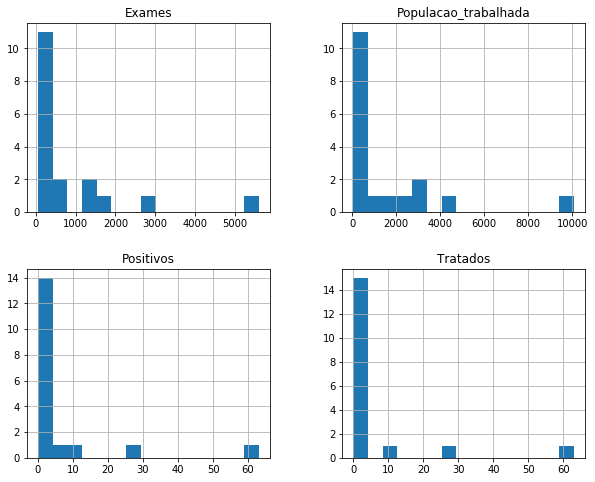

In [0]:
# Gerar um histograma das variáveis númericas
df.hist(bins=15, figsize=(10, 8))

### **Q4. Qual o tipo de distribuição das variáveis?** 

###### Apenas os dados do **SISPCE**, isolados, não podem dizer muito sobre a esquistossomose, mas quando olhamos esses dados e correlacionamos com os dados do IBGE de População total de cada município pode ser visto que :

* A população trabalhada nos municipios em questão não são homegenicas. Além disso, aparentemente são feitas de maneira aleatória porque em apenas dois municípios Aracoiaba(12,22%) e Petencoste(11,45%) a correlação população trabalhada e a população total do município passa a casa dos dez porcento que ainda não é um dado demostrativo da região.
* Além disso, isso se torna mais preocupante quando olhamos os números de exames feitos apenas um município(**Maranguape**) conseguiu fazer todos os exames que foi proposto em relação a população trabalhada.
* Quando olhamos os números de casos positivos da doença em questão podemos ver que são bem baixos, mas isso pode ser justamente devido a população trabalhada que pode ser visto que não corresponde a uma parcela significativa da população total dos municípios, além disso a quantidade de exames realizados também é um fator que pode limitar a positividade, justamente pelo seu número ser reduzido.
* Apenas um município(**Baturité**) deixou de tratar os pacientes que positivaram nos exames, isso é perigoso justamente porque pode levar ao aumento da doença em questão.
* Um dado importante são os de três municípios Jati, Mauriti e Brejo Santo, porque existe uma obra chamada A transposição do Rio São Francisco que, aparentemente, pode chegar ainda em 2020. Essa obra vai passar em vários locais do Nordeste e com isso pode trazer uma gama de biodiversidade alta para as regiões do Ceará, como novos caramujos, novos parasitos de veiculação hidrica e devido a isso, essas regiões em questão, deveriam ter um olhar mais cuidadoso em relação a esquistossomose para saber se, caso ocorra, um aumento dos casos da doença, se possa correlacionar com a vinda das águas.
* Mas, como visto pelos dados abaixo as regiões em questão Jati(3,23%), Mauriti(0,25%) e Brejo Santo(0,12%) tem números baixissimos de população trabalhada quando correlaciona com a população total dos municípios e quando olhamos os números de exames esses números são bem mais baixos, isso mostra um olhar preocupante.

In [0]:
# Ver municípios em relação as variáveis com os dados do SISPCE
df.groupby(['Municipio', 'Populacao_trabalhada','Exames', 'Positivos']).Tratados.max().sort_values()[:19] 

Municipio                        Populacao_trabalhada  Exames  Positivos
230090 Apuiares                  545                   264     0             0
230210 Baturite                  2598                  1326    8             0
230250 Brejo Santo               62                    60      0             0
231240 Sao GonÃ§alo do Amarante  529                   224     0             0
231260 Sao Luis do Curu          233                   109     0             0
231100 Poranga                   320                   139     0             0
231010 Palmacia                  135                   135     0             0
231020 Paracuru                  98                    58      0             0
231025 Paraipaba                 1490                  623     0             0
231070 Pentecoste                4326                  1399    0             0
230100 Aquiraz                   321                   162     1             1
230420 Crato                     10077                 559

In [0]:
# ver municípios em relação as variáveis com os dados do IBGE
dg.groupby(['Municipio']).Populacao.max().sort_values(ascending=False)[:19]

Municipio
Crato                      132123
Maranguape                 128978
Aquiraz                     80271
Brejo Santo                 49477
Sao Goncalo do Amarante     48422
Mauriti                     47962
Pentecoste                  37751
Baturite                    35750
Paracuru                    35076
Paraipaba                   32744
Aracoiaba                   26469
Uruburetama                 21850
Jaguaretama                 18162
Apuiares                    14600
Palmacia                    13322
Sao Luis do Curu            13000
Poranga                     12336
Jati                         8111
Name: Populacao, dtype: int64

### **Q5. Qual a correlação existente entre as variáveis**

In [0]:
# criar uma matriz de correlação 
corr = df[['Populacao_trabalhada', 'Exames', 'Positivos', 'Tratados']].corr()
display(corr)

# mostrar a matriz de correlação

,Populacao_trabalhada,Exames,Positivos,Tratados
Populacao_trabalhada,1.000000,0.958903,0.066071,0.053345
Exames,0.958903,1.000000,0.287158,0.276024
Positivos,0.066071,0.287158,1.000000,0.992645
Tratados,0.053345,0.276024,0.992645,1.000000


Como visto acima existe algumas correlações, para uma melhor visualização um Heatmap será gerado.

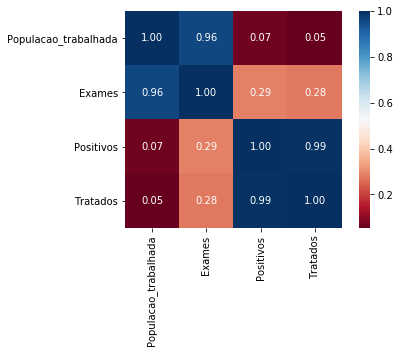

In [0]:
# Geração de um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True) ;

* Existem algumas correlações(quanto mais proximo de um, maior a correlação), mas tem que ser lembrado que os números são a soma de todos os valores e não a relação de cada munícipio com suas variáveis em questão. Ex- quando olhamos o número de positivos em relação ao número de tratados podemos ver uma correlação significante, só não é 100% porque o município de Baturité, não tratou seus positivos, como mostrado acima.
* Além disso, existe também uma correlação entre a População_trabalhada e o número de Exames, justamente se pegamos apenas os números do SISPCE, mas como já comentado acima, esses números podem enganar quando comparados com a quantidade total da população dos município, mostrando que os números estão longe de serem representativos.

## Conclusões

* Foi feito uma análise superficial dos dados do SISPCE e mesmo assim foram encontrados dados interessantes e quando correlacinado com os dados do IBGE se pode ter conclusões mais expressivas.
* Além disso, é importante reiterar a importancia dos municípios Jati, Mauriti e Brejo Santo em relação ao possível aumento da doença em questão nessas regiões em específico.